In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder
import joblib
from sklearn.preprocessing import StandardScaler
ruta = r"C:\Users\uzgre\Codes\Python\Datathon\Reto Oxxo"
archivo = os.path.join(ruta, "Dataset_Train_limpio2.csv")

# === Lectura del archivo ===
with open(archivo, 'r', encoding='utf-8', errors='replace') as f:
    Data = pd.read_csv(f)

archivo_test = os.path.join(ruta, "Dataset_Test_limpio2.csv")

# === Lectura del archivo ===
with open(archivo_test, 'r', encoding='utf-8', errors='replace') as f:
    Data_test = pd.read_csv(f)

#from sklearn.preprocessing import StandardScaler
x_train = Data.drop(columns=['EXITOSA'])
y_train = Data['EXITOSA']

x_test = Data_test.drop(columns=['EXITOSA'])
y_test = Data_test['EXITOSA']

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


print(Data_test['EXITOSA'].value_counts())

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

modelo = LogisticRegression(penalty='l2', solver='liblinear')  # 'liblinear' para pequeños datasets
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

print("\n=== Matriz de Confusión ===")
print(confusion_matrix(y_test, y_pred))

### XGBoost

c:\Users\uzgre\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:22:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Classification Report ===
              precision    recall  f1-score   support

         0.0     0.7455    0.7069    0.7257        58
         1.0     0.6222    0.6667    0.6437        42

    accuracy                         0.6900       100
   macro avg     0.6838    0.6868    0.6847       100
weighted avg     0.6937    0.6900    0.6912       100


=== Matriz de Confusión ===
[[41 17]
 [14 28]]


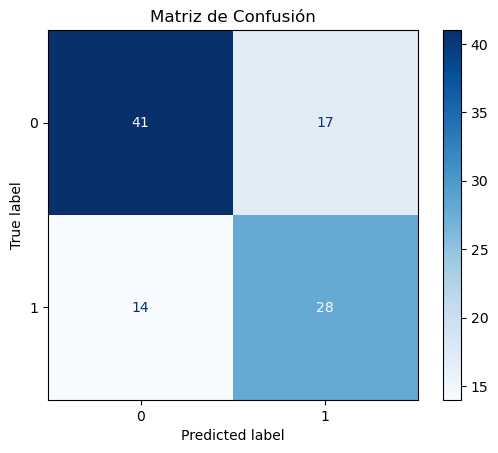

In [6]:
import numpy as np
import pandas as pd
import os
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# === Rutas y lectura de datos ===
ruta = r"C:\Users\uzgre\Codes\Python\Datathon\Reto Oxxo"
archivo_train = os.path.join(ruta, "Dataset_Train_limpio2.csv")
archivo_test = os.path.join(ruta, "Dataset_Test_limpio2.csv")

# === Carga ===

with open(archivo_train, 'r', encoding='utf-8', errors='replace') as f:
    Data = pd.read_csv(f)


# === Lectura del archivo ===
with open(archivo_test, 'r', encoding='utf-8', errors='replace') as f:
    Data_test = pd.read_csv(f)

# === Separación de variables ===
X_train = Data.drop(columns=['EXITOSA'])
y_train = Data['EXITOSA']

X_test = Data_test.drop(columns=['EXITOSA'])
y_test = Data_test['EXITOSA']

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Entrenamiento con XGBoost ===
modelo = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # balanceo de clases
    n_estimators=50,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

modelo.fit(X_train_scaled, y_train)
y_pred = modelo.predict(X_test_scaled)

# === Evaluación ===
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

print("\n=== Matriz de Confusión ===")
print(confusion_matrix(y_test, y_pred))

# Visualización de la matriz de confusión
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


# === Rutas y lectura de datos ===
ruta = r"C:\Users\uzgre\Codes\Python\Datathon\Reto Oxxo"
archivo_train = os.path.join(ruta, "Dataset_Train_limpio.csv")
archivo_test = os.path.join(ruta, "Dataset_Test_limpio.csv")

# === Carga ===

with open(archivo_train, 'r', encoding='utf-8', errors='replace') as f:
    Data = pd.read_csv(f)


# === Lectura del archivo ===
with open(archivo_test, 'r', encoding='utf-8', errors='replace') as f:
    Data_test = pd.read_csv(f)

cols = [
    'LONGITUD_NUM',
    'LATITUD_NUM',
    'MTS2VENTAS_NUM',
    'PUERTASREFRIG_NUM',
    'PLAZA_CVE',
    'CAJONESESTACIONAMIENTO_NUM',
    'NIVELSOCIOECONOMICO_DES',
    'EXITOSA'
]

Data = Data[cols]
Data_test = Data_test[cols]

# === Separación de variables ===
X_train = Data.drop(columns=['EXITOSA'])
y_train = Data['EXITOSA']

X_test = Data_test.drop(columns=['EXITOSA'])
y_test = Data_test['EXITOSA']

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definimos el modelo
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # salida binaria
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Entrenamos
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# Evaluamos
y_pred_probs = model.predict(X_test_scaled).flatten()
y_pred_classes = (y_pred_probs > 0.5).astype(int)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_classes, digits=4))
print("\n=== Matriz de Confusión ===")
print(confusion_matrix(y_test, y_pred_classes))


Epoch 1/100


c:\Users\uzgre\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5698 - loss: 0.6875 - val_accuracy: 0.6374 - val_loss: 0.7049
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5681 - loss: 0.6766 - val_accuracy: 0.6044 - val_loss: 0.7070
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5905 - loss: 0.6650 - val_accuracy: 0.6374 - val_loss: 0.7048
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.6657 - val_accuracy: 0.6319 - val_loss: 0.7121
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5710 - loss: 0.6802 - val_accuracy: 0.6319 - val_loss: 0.7199
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6186 - loss: 0.6551 - val_accuracy: 0.6319 - val_loss: 0.7245
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5976 - loss: 0.6723 - val_accuracy: 0.6319 - val_loss: 0.7392
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5799 - loss: 0.6671 - val_accuracy: 0.6319 - val_loss: 0.7